In [137]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
import statistics as stat

In [ ]:
"""
Assigment 1 - Monte Carlo Simulation
"""

class MonteCarlo:
    def __init__(self, p, k, amount_batches):
        self.p = p
        self.k = k
        self.amount_tests_all_batches = 0
        self.amount_batches = amount_batches
        self.current_batch = None

        self.amount_tests_all_batches += self.amount_batches

    # Checks whether batch is positive or negative
    def batch_check_function(self):
        check = False
        for individual in self.current_batch:
            if individual <= self.p:
                check = True
                break
        return check

    # Calculates the number of tests requires
    def number_of_tests_required(self):
        if self.batch_check_function():
            return self.k
        else:
            return 0

    def test_all(self):
        for i in range(self.amount_batches):
            self.current_batch = np.random.rand(self.k) # create batch
            self.amount_tests_all_batches += self.number_of_tests_required()
        return self.amount_tests_all_batches

# Press the green button in the gutter to run the script.
if __name__ == '__main__':

    k_list = list(np.arange(1, 101, 1))
    # print(k_list)
    p_list = [0.1, 0.01, 0.001, 0.0001]
    N = 1000000
    batch_dict_p = {}
    simulations = 10

    for p in p_list:
        batch_dict_p[p] = {}
        for k in k_list:
            amount_test_ = []
            for i in range(simulations):
                amount_batches = int(N / k)
                monte_carlo_test = MonteCarlo(p, k, amount_batches)
                amount_test_.append(monte_carlo_test.test_all())
            batch_dict_p[p][k] = stat.mean(amount_test_)
            # break

    print(batch_dict_p)

    for p__ in batch_dict_p.keys():
        min_value = float('inf')
        min_key = None

        for k__, value in batch_dict_p[p__].items():
            if value < min_value:
                min_value = value
                min_key = k__
        print(f'For p: {p__} \n'
              f'The smallest number of tests is: {min_value} \n'
              f'Which belongs to batch size {min_key}. \n'
              f'Workload reduction: {100 - (min_value/N)*100}%')



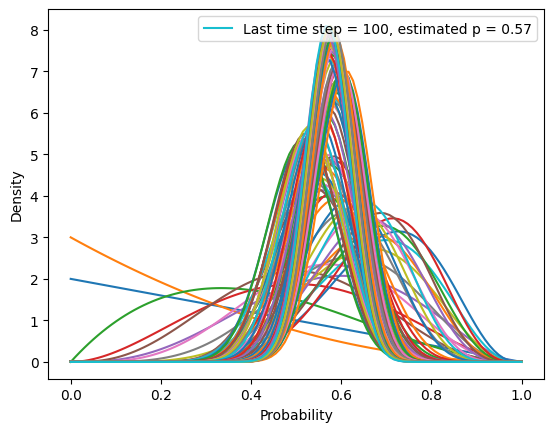

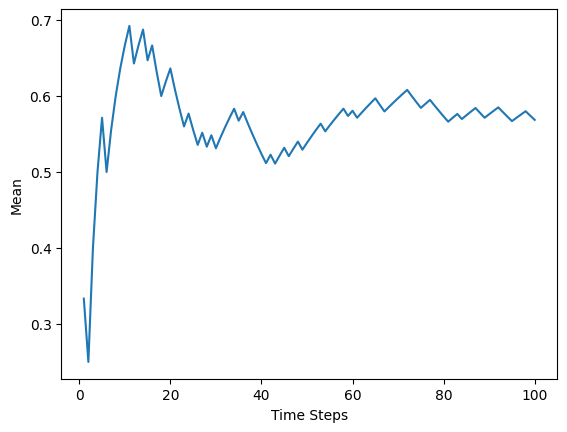

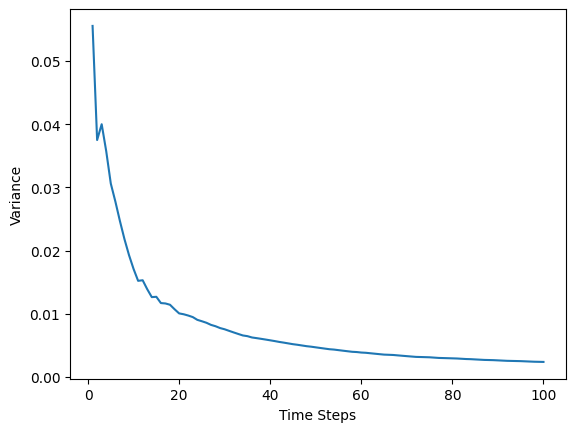

In [141]:
"""
Assigment 2.1 - Single Arm K-Bandit
"""

class k_bandit:
    def __init__(self, p, time_steps):
        self.p = p
        self.time_steps = time_steps
        self.current_r = None
        self.a = 1
        self.b = 1
        self.variance_data = {}
        self.estimated_p_dict = {}
        self.current_timestep = None
        self.x = np.linspace(0, 1, 100)
        plt.figure()

    def pull(self):
        self.current_r = np.random.choice([1, 0], p=[self.p, 1 - self.p])

    def update_a_and_b(self):
        # self.pull()
        self.a += self.current_r
        self.b += (1 - self.current_r)

    def create_beta_plot(self):
        y = beta.pdf(self.x, self.a, self.b) # TODO: WRITE IT OUT
        if self.current_timestep == self.time_steps: # label only the last time step
            current_p = self.estimated_p_dict[self.current_timestep]
            rounded_p = round(current_p, 2)
            plt.plot(self.x, y, label=f'Last time step = {self.current_timestep}, estimated p = {rounded_p}')
        else:
            plt.plot(self.x, y)

    def calculate_estimated_p(self):
        estimated_p = self.a / (self.a + self.b)
        self.estimated_p_dict[self.current_timestep] = estimated_p

    def calculate_variance(self):
        variance = (self.a * self.b)/((self.a + self.b)**2 * (self.a + self.b +1))
        self.variance_data[self.current_timestep] = variance
        # self.variance_data.append(variance)

    def plot_beta(self):
        # plt.title(f'Evolution Beta Distribution true p = {self.p}')
        plt.xlabel('Probability')
        plt.ylabel('Density')
        plt.legend()
        plt.savefig(f'beta_plot_{self.p}_{self.time_steps}.png')

    def plot_mean(self):
        plt.figure()
        keys = self.estimated_p_dict.keys()
        values = self.estimated_p_dict.values()
        plt.plot(keys, values, label=f'Mean True P {self.p}')
        # plt.legend()
        # plt.title(f'Mean Thompson')
        plt.xlabel('Time Steps')
        plt.ylabel('Mean')
        plt.savefig(f'mean_plot_{time_steps}.png')

    def plot_variance(self):
        plt.figure()
        # plt.title(f'Variance {self.p}')
        plt.xlabel('Time Steps')
        plt.ylabel('Variance')
        keys = self.variance_data.keys()
        values = self.variance_data.values()
        plt.plot(keys, values)
        plt.savefig(f'variance_plot_{self.p}_{self.time_steps}.png')

    def main_loop(self):
        for t in range(self.time_steps):
            self.current_timestep = t + 1
            self.pull()
            self.update_a_and_b()
            self.calculate_estimated_p()
            self.create_beta_plot()
            self.calculate_variance()
        self.plot_beta()
        self.plot_mean()
        self.plot_variance()

if __name__ == '__main__':
    true_p = 0.5
    k = 1
    time_steps = 100

    for arm in range(k):
        game = k_bandit(true_p, time_steps)
        game.main_loop()

0.05555555555555555
0.0375
0.05555555555555555
0.0375
0.02666666666666667
0.05555555555555555
0.0375
0.04
0.03571428571428571
0.030612244897959183
0.027777777777777776
0.024691358024691357
0.02181818181818182
0.01928374655647383
0.018696581196581196
0.0169061707523246
0.015306122448979591
0.015
0.013786764705882353
0.012687427912341407
0.012508122157244964
0.01218836565096953
0.011785714285714287
0.011131725417439703
0.010510240747394898
0.00992438563327032
0.009375
0.008861538461538462
0.008766162612316459
0.008622378992749364
0.008224841660802252
0.007847800237812128
0.007491039426523297
0.007154006243496358
0.0068359375
0.006806028196402528
0.006524962926347009
0.006258503401360544
0.006006006006006006
0.005766790973049864
0.0057710064635272396
0.005555555555555556
0.005350609756097561
0.005155661312710688
0.004970205136318093
0.0047937460052116625
0.0048209366391184574
0.004659151905528717
0.004675622410811245
0.004526935264825713
0.004384566326530612
0.00424822990420658
0.00411764

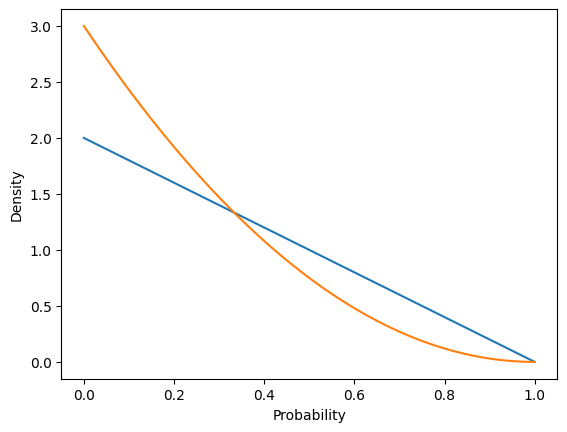

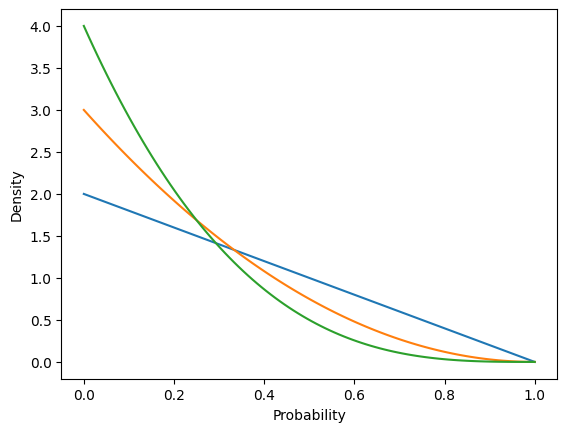

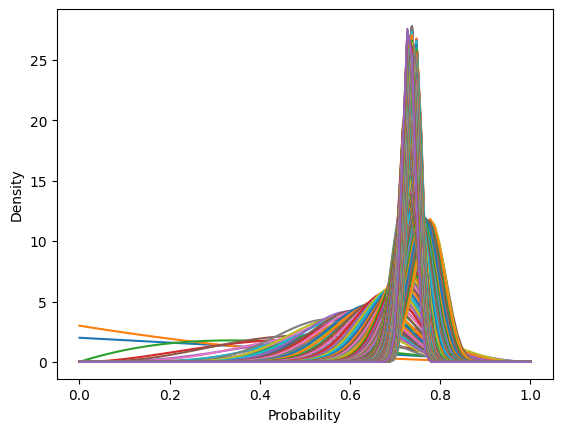

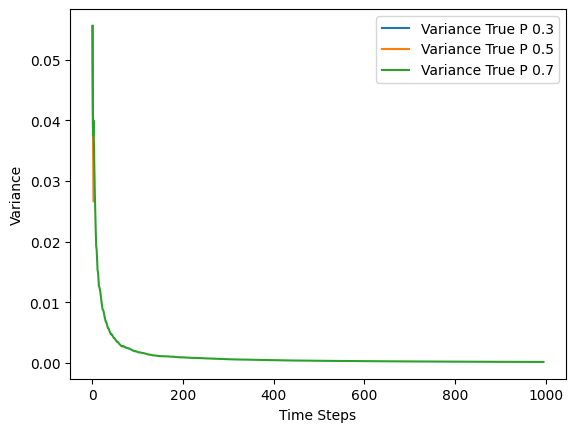

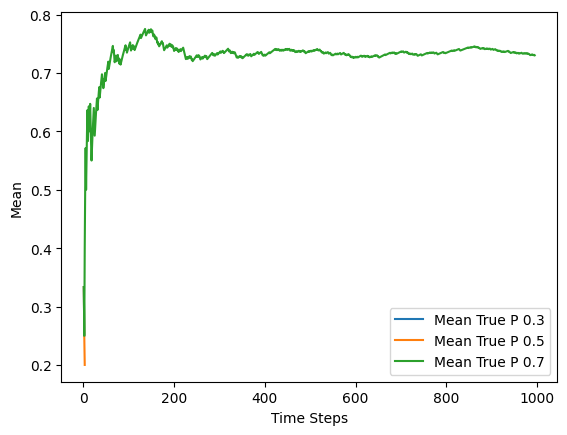

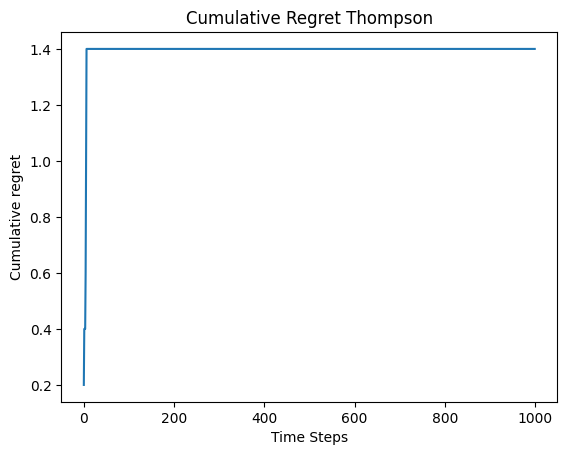

In [142]:
"""
Assignment 2
Question 2

As this algorithm is super greedy, it does not always pull every arm. Therefore the plots are sometimes empty. Run the code multiple times to see how it affects the pulling.
"""

def save_cumulative_regret_plot(cumulative_regret_dict):
    plt.figure()
    plt.plot(list(cumulative_regret_dict.keys()), list(cumulative_regret_dict.values()), linestyle='-')
    plt.title(f'Cumulative Regret Thompson')
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative regret')
    
def calculate_regret(r_mean_optimal_arm, r_mean_non_optimal_arm):
    if r_mean_optimal_arm == r_mean_non_optimal_arm:
        return 0
    else:
        return r_mean_optimal_arm - r_mean_non_optimal_arm

# Exercise 2.1
class thompson:
    def __init__(self, p, arm):
        self.p = p
        self.arm = arm
        self.current_r = None
        self.a = 1
        self.b = 1
        self.beta_distributions = {}
        self.variance_data = {}
        self.estimated_p_dict = {}
        self.current_timestep = 0
        self.x = np.linspace(0, 1, 100)
        self.current_beta_distribution_sample = np.random.beta(self.a, self.b)

    def pull(self):
        self.current_r = np.random.choice([1, 0], p=[self.p, 1 - self.p])

    def update_a_and_b(self):
        self.a += self.current_r
        self.b += (1 - self.current_r)

    def save_beta_plot(self):
        y = beta.pdf(self.x, self.a, self.b)
        self.current_beta_distribution_sample = np.random.beta(self.a, self.b)
        self.beta_distributions[self.current_timestep] = y

    def calculate_estimated_p(self):
        estimated_p = self.a / (self.a + self.b)
        self.estimated_p_dict[self.current_timestep] = estimated_p

    def calculate_variance(self):
        variance = (self.a * self.b) / ((self.a + self.b)**2 * (self.a + self.b + 1))
        print(variance)
        self.variance_data[self.current_timestep] = variance

    def plot_beta(self):
        plt.figure()
        # plt.title(f'Evolution Beta Distribution true p = {self.p}')
        plt.xlabel('Probability')
        plt.ylabel('Density')
        for y in self.beta_distributions.values():
            plt.plot(self.x, y)
        plt.savefig(f'beta_plot_{self.p}_{self.current_timestep}_{self.arm}.png')

    def plot_mean(self):
        keys = self.estimated_p_dict.keys()
        values = self.estimated_p_dict.values()
        plt.plot(keys, values, label=f'Mean True P {self.p}')

    def plot_variance(self):
        keys = self.variance_data.keys()
        values = self.variance_data.values()
        plt.plot(keys, values, label=f'Variance True P {self.p}')

    def loop_pull(self):
        self.current_timestep += 1
        self.pull()
        self.update_a_and_b()
        self.calculate_estimated_p()
        self.save_beta_plot()
        self.calculate_variance()

if __name__ == '__main__':
    true_p = {1: 0.3, 2: 0.5, 3: 0.7}
    game_class_dict = {}
    sample_dict = {}
    k = 3
    time_steps = 1000
    total_regret = 0
    cumulative_regret_thompson = {}
    optimal_arm = max(true_p,key=true_p.get)

    # CREATE CLASS OBJECTS
    for arm in range(k):
        game_class_dict[arm + 1] = thompson(true_p[arm + 1], arm + 1)

    # MAIN LOOP
    for i in range(time_steps):
        for arm in game_class_dict.keys():
            sample = game_class_dict[arm].current_beta_distribution_sample
            sample_dict[arm] = sample

        best_sample_arm = max(sample_dict, key=sample_dict.get)
        game_class_dict[best_sample_arm].loop_pull()
        
        # Calculate and update regret
        regret = calculate_regret(true_p[optimal_arm], true_p[best_sample_arm])
        total_regret += regret
        cumulative_regret_thompson[i] = total_regret

    for arm in game_class_dict.keys():
        game_class_dict[arm].plot_beta()
    
    # PLOT VARIANCE
    plt.figure()
    for arm in game_class_dict.keys():
        game_class_dict[arm].plot_variance()
    plt.legend()
    # plt.title(f'Variance Thompson')
    plt.xlabel('Time Steps')
    plt.ylabel('Variance')
    plt.savefig(f'variance_plot_{time_steps}.png')
    
    plt.figure()
    for arm in game_class_dict.keys():
        game_class_dict[arm].plot_mean()
    plt.legend()
    # plt.title(f'Mean Thompson')
    plt.xlabel('Time Steps')
    plt.ylabel('Mean')
    plt.savefig(f'mean_plot_{time_steps}.png')
    
    save_cumulative_regret_plot(cumulative_regret_thompson)
    print(f'Total regret = {total_regret}')
    

For c = 0.5 and T = 1000 
Total regret = 10.999999999999996 

For c = 0.7 and T = 1000 
Total regret = 13.599999999999994 

For c = 1.0 and T = 1000 
Total regret = 17.399999999999977 

For c = 2.0 and T = 1000 
Total regret = 31.399999999999945 


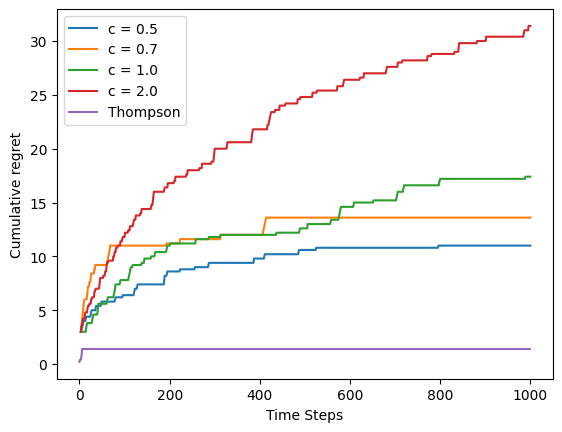

In [155]:
"""
Assignment 2
Question 3, UCB method

Definition regret: 
- My optimal arm is the with the highest mean reward (true p).
- When I pull a non optimal arm, I calculate the difference with the mean of the optimal arm and the non optimal arm and add the regret to my total regret so far.
- If I draw from the optimal arm, then my regret is 0.
"""

def save_cumulative_regret_plot():
    plt.plot(list(cumulative_regret_thompson.keys()), list(cumulative_regret_thompson.values()), linestyle='-', label=f'Thompson')
    # plt.title(f'Cumulative Regret UCB')
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative regret')
    plt.legend()
    plt.savefig(f'cumulative_regret.png')
    
def plot_cumulative_regret(cumulative_regret_dict, c):
    # plt.figure()
    plt.plot(list(cumulative_regret_dict.keys()), list(cumulative_regret_dict.values()), linestyle='-', label=f'c = {c}')
    # plt.legend()
    # plt.savefig(f'cumulative_regret_c={c}.png')
    

def calculate_regret(r_mean_optimal_arm, r_mean_non_optimal_arm):
    if r_mean_optimal_arm == r_mean_non_optimal_arm:
        return 0
    else:
        return r_mean_optimal_arm - r_mean_non_optimal_arm
    
class UCB_arm:
    def __init__(self, arm, true_p, c):
        self.arm = arm
        self.c = c
        self.true_p = true_p
        self.all_rewards = []
        self.expected_reward = 0
        # self.regret = {}
        self.UCB = None
        
        self.total_count_pulls = 0
        self.current_r = 0
    
    def pull(self):
        self.current_r = np.random.choice([1, 0], p=[self.true_p, 1 - self.true_p])
        self.all_rewards.append(self.current_r)
        self.update_expected_reward()
    
    def update_expected_reward(self):
        self.expected_reward = np.mean(self.all_rewards)
        self.all_rewards.append(self.expected_reward)
    
    def calculate_UCB(self):
        qt = self.expected_reward
        t_ = self.total_count_pulls
        nt = len(self.all_rewards)
        log_t = math.log(t_)

        self.UCB = qt + self.c * math.sqrt((log_t / nt))
        return self.UCB
    
if __name__ == '__main__':
    k = 3
    T = 1000
    p_dict = {1: 0.3, 2: 0.5, 3: 0.7}
    list_c = [0.5, 0.7, 1.0, 2.0]
    optimal_arm = max(p_dict,key=p_dict.get)
    plt.figure()
    
    for c_ in list_c:
        arms_dict = {}
        UCB_dict = {}
        total_regret = 0
        cumulative_regret = {}
        total_pull_count = 0
        
        # Initialize class for all arms, and pull arm once
        for arm in p_dict.keys():
            total_pull_count += 1
            arms_dict[arm] = UCB_arm(arm, p_dict[arm], c_)  # Create class object for arm
            arms_dict[arm].pull() # pull arm
        
        # Update total pulls count
        for arm in arms_dict.keys():
            arms_dict[arm].total_count_pulls = total_pull_count 
            
            # Calculate and update regret
            regret = calculate_regret(optimal_arm, arm)
            total_regret += regret
            cumulative_regret[total_pull_count] = total_regret
            
        for t in range(T - total_pull_count):
            total_pull_count += 1
            
            # Calculate UCB for all arms
            # Already update total pull count
            for arm in arms_dict.keys():
                UCB_dict[arm] = arms_dict[arm].calculate_UCB()
                arms_dict[arm].total_count_pulls = total_pull_count
                
            # Choose arm to pull
            chosen_arm = max(UCB_dict, key=UCB_dict.get)
            # Pull chosen arm
            arms_dict[chosen_arm].pull()
            
            # Calculate and update regret
            regret = calculate_regret(p_dict[optimal_arm], p_dict[chosen_arm])
            total_regret += regret
            cumulative_regret[total_pull_count] = total_regret
        
        plot_cumulative_regret(cumulative_regret, c_)
        print(f'For c = {c_} and T = {T} \n'
              f'Total regret = {total_regret} \n')
    save_cumulative_regret_plot()

In [89]:
"""
3. Reinforcement Learning: SARSA
"""
import numpy as np
import os
import json
import random
import csv

class SARSA_agent:
    def __init__(self, q_table, learning_rate, grid, epsilon):
        self.q_table = q_table
        self.epsilon = epsilon
        self.Q = None
        self.grid = grid
        self.move_counter = 0
        self.max_goal_reach = 100
        self.alpha = learning_rate
        self.terminal_goal_counter = 0
        self.track_states = {}
        self.test = False
        self.round = 1

        self.starting_row = 3
        self.starting_column = 0

        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_action_index = None
        self.current_sav = None
        self.current_reward = self.grid[self.starting_row, self.starting_column] # Starting state
        self.current_state = self.q_table[self.current_row, self.current_column]

        self.next_row = 3
        self.next_column = 0
        self.next_state = None
        self.next_state_action_index = None
        self.next_sav = None
        self.next_reward = None

    # Moves, left right up or down
    def determine_next_move(self, action):

        self.next_row = self.current_row
        self.next_column = self.current_column
        # self.current_action_index = action

        if action == 0: # UP
            self.next_row -= 1
        elif action == 1: # DOWN
            self.next_row += 1
        elif action == 2: # LEFT
            self.next_column -= 1
        else: # RIGHT
            self.next_column += 1
        
        self.next_state = self.q_table[self.next_row, self.next_column]

        # Choose next action
        # Index and action are equal
        self.next_state_action_index = self.choose_action(self.next_state, self.next_row, self.next_column)
        
        # Index and action are equal
        self.next_sav = self.q_table[self.next_row, self.next_column, self.next_state_action_index]

    def move(self):

        self.move_counter += 1
        self.current_row = self.next_row
        self.current_column = self.next_column
        self.current_reward = self.grid[self.current_row, self.current_column]
        self.current_state = self.q_table[self.current_row, self.current_column]


    def get_possible_moves(self, row, column):
        possible_moves = [0,1,2,3]
        if row == 0:
            possible_moves.remove(0)
        if row == 3:
            possible_moves.remove(1)
        if column == 11:
            possible_moves.remove(3)
        if column == 0:
            possible_moves.remove(2)
        return possible_moves

    # Update state action values
    def update_sav(self):
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + self.next_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Checks whether you are in a terminal state
    def check_terminal_state(self):
        if self.current_reward == -100 or self.current_reward == 20:
            self.round += 1
            self.current_column = self.starting_column
            self.current_row = self.starting_row

            # REMOVE LATER
            if self.current_reward == -100 and self.test is True:
                if self.round in self.track_states:
                    self.track_states[self.round].append((self.current_row, self.current_column))
                else:
                    self.track_states[self.round] = []
                    self.track_states[self.round].append((self.current_row, self.current_column))

            if self.current_reward == 20:
                self.terminal_goal_counter += 1
                # print('GOAL STATE WAS REACHED!')

    def choose_action(self, state, row, column):
        possible_actions = self.get_possible_moves(row,column)

        # while True:
        if np.random.rand() < self.epsilon:
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            action = random.choice(possible_actions)
        else:
            # Exploitation: choose the best action based on current Q-values
            actions_q_values = {}
            for action in possible_actions:
                actions_q_values[action] = state[action]
            action = max(actions_q_values, key=lambda k:actions_q_values[k])
        return action

    def main_loop(self):
        iteration_counter = 0
        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move
            self.check_terminal_state() # Check terminal state
            if self.terminal_goal_counter == self.max_goal_reach:
                break
            iteration_counter += 1

    def round_till_goal(self):
        iteration_counter = 0
        self.round = 0
        self.terminal_goal_counter = 0
        self.track_states[self.round] = []
        self.track_states[self.round].append((self.current_row, self.current_column))
        self.test = True

        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move

            if self.round in self.track_states:
                self.track_states[self.round].append((self.current_row, self.current_column))
            else:
                self.track_states[self.round] = []
                self.track_states[self.round].append((self.current_row, self.current_column))

            self.check_terminal_state() # Check terminal state
            iteration_counter += 1

            if self.terminal_goal_counter == 1:
                break
        with open(f'{folder_path}/SARSA_path_a={self.alpha}_e={self.epsilon}_{self.max_goal_reach}.json', 'w') as json_file:
            json.dump(self.track_states, json_file)

if __name__ == '__main__':

    # CREATE GRID
    grid = np.full((4, 12), -1)
    grid[3, 1:-1] = -100
    grid[3, -1] = 20

    q_table = np.zeros((4, 12, 4))

    learning_rate = 0.1 # randomly chosen by me :)
    epsilon_list = [0.01, 0.05, 0.1]
    folder_path = ' SARSA'
    simulations = 10
    # Make sure the folder exists
    os.makedirs(folder_path, exist_ok=True)
    dict_train_info = {}
    
    for epsilon in epsilon_list:
        dict_train_info[epsilon] = [0,0,0,0,0]
    
    # SARSA
    for epsilon in epsilon_list:
        for _ in range(simulations):
            q_table = np.zeros((4, 12, 4))
            game = SARSA_agent(q_table, learning_rate, grid, epsilon)
            game.main_loop()
            dict_train_info[epsilon][0] += game.move_counter
            dict_train_info[epsilon][1] += game.round
            dict_train_info[epsilon][2] += game.round - game.max_goal_reach

            # SAVE
            filename = f'SARSA_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy'
            full_path = os.path.join(folder_path, filename)
            np.save(full_path, game.q_table)
            q_table = np.load(f'{folder_path}/SARSA_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy')
            game = SARSA_agent(q_table, learning_rate, grid, epsilon)
            game.round_till_goal()
            dict_train_info[epsilon][3] += game.move_counter
            dict_train_info[epsilon][4] += game.round
    
    for key, value in dict_train_info.items():
        mean_values = [x / simulations for x in value]
        dict_train_info[key] = mean_values
    
    # The filename where you want to store the data
    filename = f'{folder_path}/SARSA_AGENT_INFO_a={learning_rate}_sim={simulations}_maxgoal={game.max_goal_reach}.csv'
    
    # Labels for the columns
    labels = ['Epsilon', 'Moves', 'Rounds', 'Fails', 'Moves_till_goal', 'Rounds_till_goal']
    
    # Write to the file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(labels)
        
        # Write the dictionary data
        for key, value in dict_train_info.items():
            writer.writerow([key] + value)


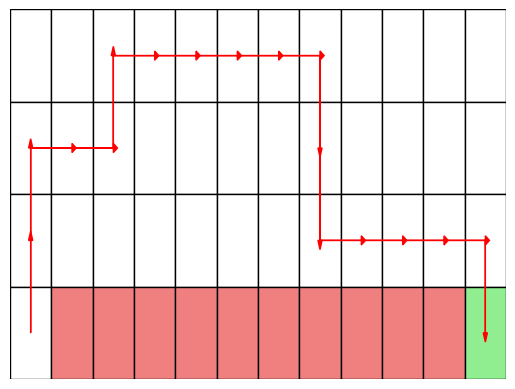

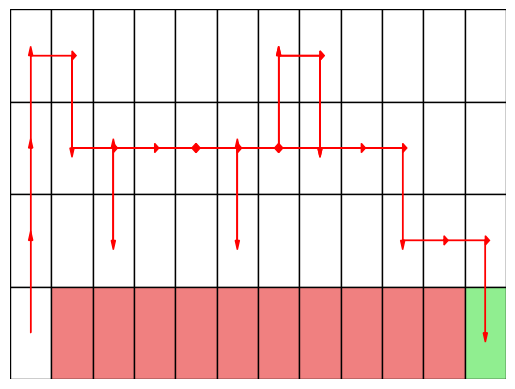

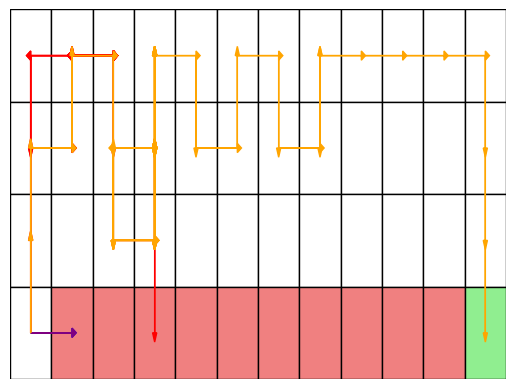

In [91]:
"""
Visualisation 
SARSA AGENT
"""
import matplotlib.pyplot as plt
import numpy as np
import json

# Define the grid as per your values
grid = np.full((4, 12), -1)
grid[3, 1:-1] = -100
grid[3, -1] = 20

epsilon_list = [0.01, 0.05, 0.1]
learning_rate = 0.1  # randomly chosen by me :)
rounds_till_win = 100
folder_path = ' SARSA'
os.makedirs(folder_path, exist_ok=True)

for epsilon in epsilon_list:

    # Later on, load the JSON file
    with open(f'{folder_path}/SARSA_path_a={learning_rate}_e={epsilon}_{rounds_till_win}.json', 'r') as f:
        path_dict = json.load(f)

    fig, ax = plt.subplots()
    # Set the grid limits
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw the grid cells with color
    for (i, j), val in np.ndenumerate(grid):
        if val == -100:
            facecolor = 'lightcoral'  # Light red color for -100 value
        elif val == 20:
            facecolor = 'lightgreen'  # Green color for the goal state
        else:
            facecolor = 'white'  # Default color for any other value

        ax.add_patch(plt.Rectangle((j - 0.5, 3 - i - 0.5), 1, 1, facecolor=facecolor, edgecolor='black', lw=1))

    # Draw the paths with arrows, each path in different color
    colors = ['red', 'blue', 'purple', 'orange', 'pink']
    color_index = 0

    for path_key, path in path_dict.items():
        # Ensure we cycle back to the first color if we run out of unique colors
        color = colors[color_index % len(colors)]
        for i in range(len(path) - 1):
            start_point = path[i]
            end_point = path[i + 1]
            # Calculate the change in x and y direction
            dx = end_point[1] - start_point[1]
            dy = (end_point[0] - start_point[0]) * -1  # Negative because of the y-axis inversion
            ax.arrow(start_point[1], 3 - start_point[0], dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
        # Increment the color index for the next path
        color_index += 1
        
    plt.axis('off')

    # Show the plot
    plt.savefig(f'{folder_path}/SARSA_graph_e={epsilon}_a={learning_rate}_{rounds_till_win}.png')
    plt.show()


In [87]:
"""
3. Reinforcement Learning: Q LEARNING
"""
import numpy as np
import json
import random

class Q_agent:
    def __init__(self, q_table, learning_rate, grid, epsilon):
        self.q_table = q_table
        self.epsilon = epsilon
        self.Q = None
        self.grid = grid
        self.move_counter = 0
        self.max_goal_reach = 100
        self.alpha = learning_rate
        self.terminal_goal_counter = 0
        self.track_states = {}
        self.test = False
        self.round = 1

        self.starting_row = 3
        self.starting_column = 0

        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_action_index = None
        self.current_sav = None
        self.current_reward = self.grid[self.starting_row, self.starting_column] # Starting state
        self.current_state = self.q_table[self.current_row, self.current_column]

        self.next_row = 3
        self.next_column = 0
        self.next_state = None
        self.next_state_action_index = None
        self.next_sav = None
        self.next_reward = None

    # Moves, left right up or down
    def determine_next_move(self, action):

        self.next_row = self.current_row
        self.next_column = self.current_column
        # self.current_action_index = action

        if action == 0: # UP
            self.next_row -= 1
        elif action == 1: # DOWN
            self.next_row += 1
        elif action == 2: # LEFT
            self.next_column -= 1
        else: # RIGHT
            self.next_column += 1
        
        self.next_state = self.q_table[self.next_row, self.next_column]

        # Choose next action
        # Index and action are equal
        self.next_state_action_index = self.choose_action(self.next_state, self.next_row, self.next_column)
        
        # Index and action are equal
        self.next_sav = self.q_table[self.next_row, self.next_column, self.next_state_action_index]

    def move(self):
        self.move_counter += 1
        self.current_row = self.next_row
        self.current_column = self.next_column
        self.current_reward = self.grid[self.current_row, self.current_column]
        self.current_state = self.q_table[self.current_row, self.current_column]


    def get_possible_moves(self, row, column):
        possible_moves = [0,1,2,3]
        if row == 0:
            possible_moves.remove(0)
        if row == 3:
            possible_moves.remove(1)
        if column == 11:
            possible_moves.remove(3)
        if column == 0:
            possible_moves.remove(2)

        return possible_moves

    def Q_update_sav(self):
        next_possible_moves = self.get_possible_moves(self.next_row, self.next_column)
        possible_savs = {}
        for move in next_possible_moves:
            possible_savs[move] = self.q_table[self.next_row, self.next_column, move]
        next_max_action = max(possible_savs, key=lambda k:possible_savs[k])

        next_max_sav = self.q_table[self.next_row, self.next_column, next_max_action]
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + next_max_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Checks whether you are in a terminal state
    def check_terminal_state(self):
        if self.current_reward == -100 or self.current_reward == 20:
            self.round += 1
            self.current_column = self.starting_column
            self.current_row = self.starting_row

            # REMOVE LATER
            if self.current_reward == -100 and self.test is True:
                if self.round in self.track_states:
                    self.track_states[self.round].append((self.current_row, self.current_column))
                else:
                    self.track_states[self.round] = []
                    self.track_states[self.round].append((self.current_row, self.current_column))

            if self.current_reward == 20:
                self.terminal_goal_counter += 1
                # print('GOAL STATE WAS REACHED!')

    def choose_action(self, state, row, column):
        possible_actions = self.get_possible_moves(row,column)

        # while True:
        if np.random.rand() < self.epsilon:
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            action = random.choice(possible_actions)
        else:
            # Exploitation: choose the best action based on current Q-values
            actions_q_values = {}
            for action in possible_actions:
                actions_q_values[action] = state[action]
            action = max(actions_q_values, key=lambda k:actions_q_values[k])
        return action

    def Q_main_loop(self):
        iteration_counter = 0
        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.Q_update_sav()  # Update sav
            self.move()  # Move
            self.check_terminal_state()  # Check terminal state
            if self.terminal_goal_counter == self.max_goal_reach:
                break
            iteration_counter += 1

    def round_till_goal(self):
        iteration_counter = 0
        self.round = 0
        self.terminal_goal_counter = 0
        self.track_states[self.round] = []
        self.track_states[self.round].append((self.current_row, self.current_column))
        self.test = True

        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.Q_update_sav() # Update sav
            self.move() # Move

            if self.round in self.track_states:
                self.track_states[self.round].append((self.current_row, self.current_column))
            else:
                self.track_states[self.round] = []
                self.track_states[self.round].append((self.current_row, self.current_column))

            self.check_terminal_state() # Check terminal state
            iteration_counter += 1

            if self.terminal_goal_counter == 1:
                break
        with open(f'{folder_path}/Q_path_a={self.alpha}_e={self.epsilon}_{self.max_goal_reach}.json', 'w') as json_file:
            json.dump(self.track_states, json_file)

if __name__ == '__main__':

    # CREATE GRID
    grid = np.full((4, 12), -1)
    grid[3, 1:-1] = -100
    grid[3, -1] = 20

    q_table = np.zeros((4, 12, 4))

    learning_rate = 0.1 # randomly chosen by me :)
    epsilon_list = [0.01, 0.05, 0.1]
    folder_path = ' Q_LEARNING'
    simulations = 10
    os.makedirs(folder_path, exist_ok=True)
    dict_train_info = {}
    
    for epsilon in epsilon_list:
        dict_train_info[epsilon] = [0,0,0,0,0]
    

    # Q learning
    for epsilon in epsilon_list:
        for _ in range(simulations):
            q_table = np.zeros((4, 12, 4))
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            game.Q_main_loop()
    
            # SAVE
            filename = f'Q_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy'
            full_path = os.path.join(folder_path, filename)
            
            dict_train_info[epsilon][0] += game.move_counter
            dict_train_info[epsilon][1] += game.round
            dict_train_info[epsilon][2] += game.round - game.max_goal_reach
            
            np.save(full_path, game.q_table)
            
            q_table = np.load(f'{folder_path}/Q_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy')
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            # game.Q = False
            game.round_till_goal()
            dict_train_info[epsilon][3] += game.move_counter
            dict_train_info[epsilon][4] += game.round

    for key, value in dict_train_info.items():
        mean_values = [x / simulations for x in value]
        dict_train_info[key] = mean_values
    
    # The filename where you want to store the data
    filename = f'{folder_path}/Q_AGENT_INFO_a={learning_rate}_sim={simulations}_maxgoal={game.max_goal_reach}.csv'
    
    # Labels for the columns
    labels = ['Epsilon', 'Moves', 'Rounds', 'Fails', 'Moves_till_goal', 'Rounds_till_goal']
    
    # Write to the file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(labels)
        
        # Write the dictionary data
        for key, value in dict_train_info.items():
            writer.writerow([key] + value)

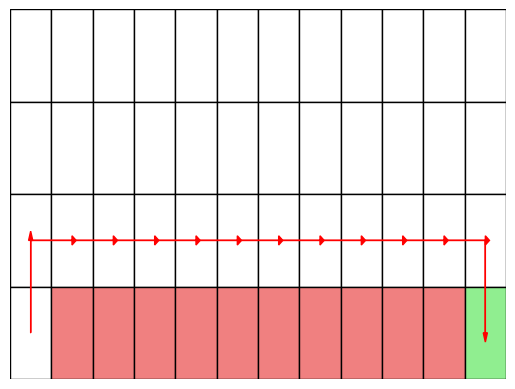

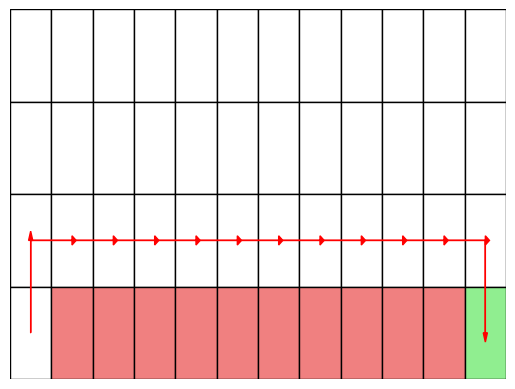

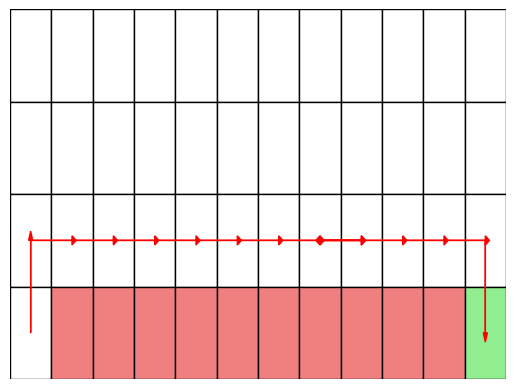

In [88]:
"""
Visualisation 
Q LEARNING AGENT
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# Define the grid as per your values
grid = np.full((4, 12), -1)
grid[3, 1:-1] = -100
grid[3, -1] = 20

epsilon_list = [0.01, 0.05, 0.1]
learning_rate = 0.1  # randomly chosen by me :)
rounds_till_win = 100
folder_path = ' Q_LEARNING'

for epsilon in epsilon_list:

    # Later on, load the JSON file
    with open(f'{folder_path}/Q_path_a={learning_rate}_e={epsilon}_{rounds_till_win}.json', 'r') as f:
        path_dict = json.load(f)
        
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw the grid cells with color
    for (i, j), val in np.ndenumerate(grid):
        if val == -100:
            facecolor = 'lightcoral'  # Light red color for -100 value
        elif val == 20:
            facecolor = 'lightgreen'  # Green color for the goal state
        else:
            facecolor = 'white'  # Default color for any other value

        ax.add_patch(plt.Rectangle((j - 0.5, 3 - i - 0.5), 1, 1, facecolor=facecolor, edgecolor='black', lw=1))
        # Annotate each cell with the corresponding value
        # ax.text(j, 3 - i, str(val), va='center', ha='center')

    # Draw the paths with arrows, each path in different color
    colors = ['red', 'blue', 'purple', 'orange', 'pink']
    color_index = 0

    for path_key, path in path_dict.items():
        # Ensure we cycle back to the first color if we run out of unique colors
        color = colors[color_index % len(colors)]
        for i in range(len(path) - 1):
            start_point = path[i]
            end_point = path[i + 1]
            # Calculate the change in x and y direction
            dx = end_point[1] - start_point[1]
            dy = (end_point[0] - start_point[0]) * -1  # Negative because of the y-axis inversion
            ax.arrow(start_point[1], 3 - start_point[0], dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
        # Increment the color index for the next path
        color_index += 1
    plt.axis('off')

    # plt.show()
    plt.savefig(f'{folder_path}/Q_graph_e={epsilon}_a={learning_rate}_{rounds_till_win}.png')
    plt.show()


In [51]:
"""
3. Reinforcement Learning: SARSA SNAKEPIT
"""
import numpy as np
import os
import json
import random
import statistics

class SARSA_agent:
    def __init__(self, q_table, learning_rate, grid, epsilon):
        self.q_table = q_table
        self.epsilon = epsilon
        self.Q = None
        self.grid = grid
        self.move_counter = 0
        self.max_goal_reach = 100
        self.alpha = learning_rate
        self.terminal_goal_counter = 0
        self.track_states = {}
        self.test = False
        self.round = 1

        self.starting_row = 3
        self.starting_column = 0

        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_action_index = None
        self.current_sav = None
        self.current_reward = self.grid[self.starting_row, self.starting_column] # Starting state
        self.current_state = self.q_table[self.current_row, self.current_column]

        self.next_row = 3
        self.next_column = 0
        self.next_state = None
        self.next_state_action_index = None
        self.next_sav = None
        self.next_reward = None

    # Moves, left right up or down
    def determine_next_move(self, action):

        self.next_row = self.current_row
        self.next_column = self.current_column
        # self.current_action_index = action

        if action == 0: # UP
            self.next_row -= 1
        elif action == 1: # DOWN
            self.next_row += 1
        elif action == 2: # LEFT
            self.next_column -= 1
        else: # RIGHT
            self.next_column += 1
        
        self.next_state = self.q_table[self.next_row, self.next_column]

        # Choose next action
        # Index and action are equal
        self.next_state_action_index = self.choose_action(self.next_state, self.next_row, self.next_column)
        
        # Index and action are equal
        self.next_sav = self.q_table[self.next_row, self.next_column, self.next_state_action_index]

    def move(self):

        self.move_counter += 1
        self.current_row = self.next_row
        self.current_column = self.next_column
        self.current_reward = self.grid[self.current_row, self.current_column]
        self.current_state = self.q_table[self.current_row, self.current_column]


    def get_possible_moves(self, row, column):
        possible_moves = [0,1,2,3]
        if row == 0:
            possible_moves.remove(0)
        if row == 3:
            possible_moves.remove(1)
        if column == 11:
            possible_moves.remove(3)
        if column == 0:
            possible_moves.remove(2)
        return possible_moves

    # Update state action values
    def update_sav(self):
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + self.next_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Checks whether you are in a terminal state
    def check_terminal_state(self):
        if self.current_reward == -100 or self.current_reward == 20:
            self.round += 1
            self.current_column = self.starting_column
            self.current_row = self.starting_row

            # REMOVE LATER
            if self.current_reward == -100 and self.test is True:
                if self.round in self.track_states:
                    self.track_states[self.round].append((self.current_row, self.current_column))
                else:
                    self.track_states[self.round] = []
                    self.track_states[self.round].append((self.current_row, self.current_column))

            if self.current_reward == 20:
                self.terminal_goal_counter += 1
                # print('GOAL STATE WAS REACHED!')

    def choose_action(self, state, row, column):
        possible_actions = self.get_possible_moves(row,column)

        # while True:
        if np.random.rand() < self.epsilon:
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            action = random.choice(possible_actions)
        else:
            # Exploitation: choose the best action based on current Q-values
            actions_q_values = {}
            for action in possible_actions:
                actions_q_values[action] = state[action]
            action = max(actions_q_values, key=lambda k:actions_q_values[k])
        return action

    def main_loop(self):
        iteration_counter = 0
        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move
            self.check_terminal_state() # Check terminal state
            if self.terminal_goal_counter == self.max_goal_reach:
                break
            iteration_counter += 1

    def round_till_goal(self):
        iteration_counter = 0
        self.round = 0
        self.terminal_goal_counter = 0
        self.track_states[self.round] = []
        self.track_states[self.round].append((self.current_row, self.current_column))
        self.test = True

        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move

            if self.round in self.track_states:
                self.track_states[self.round].append((self.current_row, self.current_column))
            else:
                self.track_states[self.round] = []
                self.track_states[self.round].append((self.current_row, self.current_column))

            self.check_terminal_state() # Check terminal state
            iteration_counter += 1

            if self.terminal_goal_counter == 1:
                break
        with open(f'{folder_path}/SARSA_SP_path_a={self.alpha}_e={self.epsilon}_{self.max_goal_reach}_{_}.json', 'w') as json_file:
            json.dump(self.track_states, json_file)

if __name__ == '__main__':

    # Snakepit grid
    grid = np.full((4, 12), -1)
    grid[3, 1:-1] = -100
    grid[3, -1] = 20
    grid[1, 10] = -100
    grid[2, 10] = -100

    q_table = np.zeros((4, 12, 4))

    learning_rate = 0.1 # randomly chosen by me :)
    epsilon_list = [0.01, 0.05, 0.1]
    folder_path = ' SARSA'
    simulations = 10
    # Make sure the folder exists
    os.makedirs(folder_path, exist_ok=True)
    dict_train_info = {}
    nested_dict_train_info = {}
    
    for epsilon in epsilon_list:
        nested_dict_train_info[epsilon] = {}
        dict_train_info[epsilon] = [0,0,0,0,0]
        
        
    # SARSA
    for epsilon in epsilon_list:
        # print(f'epsilon {epsilon}')
        end_game_moves = []
        end_game_rounds = []
        for _ in range(simulations):
            print(_)
            print(end_game_rounds)
            print(end_game_moves)
            q_table = np.zeros((4, 12, 4))
            game = SARSA_agent(q_table, learning_rate, grid, epsilon)
            game.main_loop()
            
            dict_train_info[epsilon][0] += game.move_counter
            dict_train_info[epsilon][1] += game.round
            dict_train_info[epsilon][2] += game.round - game.max_goal_reach

            # SAVE
            filename = f'SARSA_SP_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}_{_}.npy'
            full_path = os.path.join(folder_path, filename)
            np.save(full_path, game.q_table)
            
        # Loop over epsilon values
        # for epsilon in epsilon_list:
            q_table = np.load(f'{folder_path}/SARSA_SP_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}_{_}.npy')
            game = SARSA_agent(q_table, learning_rate, grid, epsilon)
            # game.Q = False
            game.round_till_goal()
            
            print(f'move counter = {game.move_counter}')
            end_game_moves.append(game.move_counter)
            print(f'round = {game.round}')
            end_game_rounds.append(game.round)
            dict_train_info[epsilon][3] += game.move_counter
            dict_train_info[epsilon][4] += game.round

    # print(nested_dict_train_info)
    
    for key, value in dict_train_info.items():
        mean_values = [x / simulations for x in value]
        dict_train_info[key] = mean_values

    # The filename where you want to store the data
    filename = f'{folder_path}/SARSA_AGENT_SP_INFO_a={learning_rate}_sim={simulations}_maxgoal={game.max_goal_reach}.csv'
    
    # Labels for the columns
    labels = ['Epsilon', 'Moves', 'Rounds', 'Fails', 'Moves_till_goal', 'Rounds_till_goal']
    
    # Write to the file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(labels)
        for key, value in dict_train_info.items():
            writer.writerow([key] + value)


epsilon 0.01
0
[]
[]
move counter = 17
round = 1
1
[1]
[17]
move counter = 143
round = 1
2
[1, 1]
[17, 143]
move counter = 19
round = 1
3
[1, 1, 1]
[17, 143, 19]
move counter = 327
round = 1
4
[1, 1, 1, 1]
[17, 143, 19, 327]
move counter = 25
round = 1
5
[1, 1, 1, 1, 1]
[17, 143, 19, 327, 25]
move counter = 17
round = 1
6
[1, 1, 1, 1, 1, 1]
[17, 143, 19, 327, 25, 17]
move counter = 17
round = 1
7
[1, 1, 1, 1, 1, 1, 1]
[17, 143, 19, 327, 25, 17, 17]
move counter = 19
round = 1
8
[1, 1, 1, 1, 1, 1, 1, 1]
[17, 143, 19, 327, 25, 17, 17, 19]
move counter = 19
round = 1
9
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[17, 143, 19, 327, 25, 17, 17, 19, 19]
move counter = 19
round = 1
epsilon 0.05
0
[]
[]
move counter = 493
round = 1
1
[1]
[493]
move counter = 47
round = 2
2
[1, 2]
[493, 47]
move counter = 27
round = 1
3
[1, 2, 1]
[493, 47, 27]
move counter = 101
round = 1
4
[1, 2, 1, 1]
[493, 47, 27, 101]
move counter = 776030
round = 136
5
[1, 2, 1, 1, 136]
[493, 47, 27, 101, 776030]
move counter = 35
round =

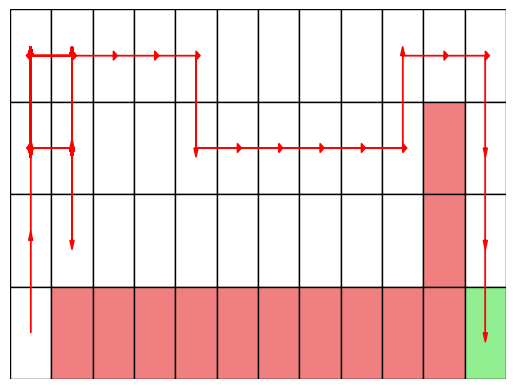

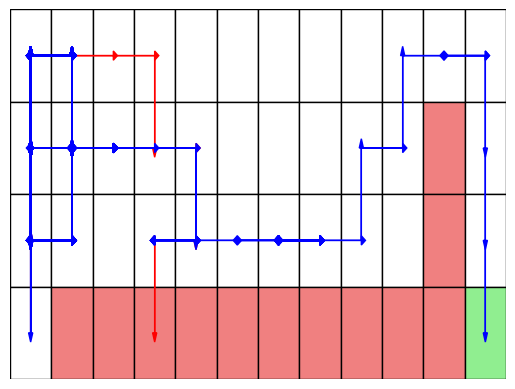

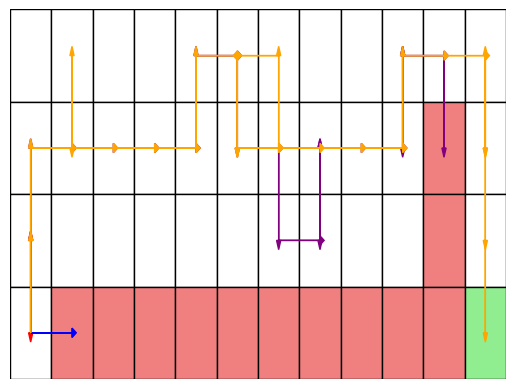

In [92]:
"""
Visualisation 
SARSA AGENT SNAKEPIT
"""
import matplotlib.pyplot as plt
import numpy as np
import json

# Define the grid as per your values
# Snakepit grid
grid = np.full((4, 12), -1)
grid[3, 1:-1] = -100
grid[3, -1] = 20
grid[1, 10] = -100
grid[2, 10] = -100

epsilon_list = [0.01, 0.05, 0.1]
learning_rate = 0.1  # randomly chosen by me :)
rounds_till_win = 100
folder_path = ' SARSA'
os.makedirs(folder_path, exist_ok=True)

for epsilon in epsilon_list:

    # Later on, load the JSON file
    with open(f'{folder_path}/SARSA_SP_path_a={learning_rate}_e={epsilon}_{rounds_till_win}.json', 'r') as f:
        path_dict = json.load(f)

    fig, ax = plt.subplots()
    # Set the grid limits
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw the grid cells with color
    for (i, j), val in np.ndenumerate(grid):
        if val == -100:
            facecolor = 'lightcoral'  # Light red color for -100 value
        elif val == 20:
            facecolor = 'lightgreen'  # Green color for the goal state
        else:
            facecolor = 'white'  # Default color for any other value

        ax.add_patch(plt.Rectangle((j - 0.5, 3 - i - 0.5), 1, 1, facecolor=facecolor, edgecolor='black', lw=1))

    # Draw the paths with arrows, each path in different color
    colors = ['red', 'blue', 'purple', 'orange', 'pink']
    color_index = 0

    for path_key, path in path_dict.items():
        # Ensure we cycle back to the first color if we run out of unique colors
        color = colors[color_index % len(colors)]
        for i in range(len(path) - 1):
            start_point = path[i]
            end_point = path[i + 1]
            # Calculate the change in x and y direction
            dx = end_point[1] - start_point[1]
            dy = (end_point[0] - start_point[0]) * -1  # Negative because of the y-axis inversion
            ax.arrow(start_point[1], 3 - start_point[0], dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
        # Increment the color index for the next path
        color_index += 1
        
    plt.axis('off')

    # Show the plot
    plt.savefig(f'{folder_path}/SARSA_SP_graph_e={epsilon}_a={learning_rate}_{rounds_till_win}.png')
    plt.show()


In [93]:
"""
3. Reinforcement Learning: Q LEARNING SNAKEPIT
"""
import numpy as np
import json
import random

class Q_agent:
    def __init__(self, q_table, learning_rate, grid, epsilon):
        self.q_table = q_table
        self.epsilon = epsilon
        self.Q = None
        self.grid = grid
        self.move_counter = 0
        self.max_goal_reach = 100
        self.alpha = learning_rate
        self.terminal_goal_counter = 0
        self.track_states = {}
        self.test = False
        self.round = 1

        self.starting_row = 3
        self.starting_column = 0

        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_action_index = None
        self.current_sav = None
        self.current_reward = self.grid[self.starting_row, self.starting_column] # Starting state
        self.current_state = self.q_table[self.current_row, self.current_column]

        self.next_row = 3
        self.next_column = 0
        self.next_state = None
        self.next_state_action_index = None
        self.next_sav = None
        self.next_reward = None
        
    # Update state action values
    def update_sav(self):
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + self.next_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Moves, left right up or down
    def determine_next_move(self, action):

        self.next_row = self.current_row
        self.next_column = self.current_column
        # self.current_action_index = action

        if action == 0: # UP
            self.next_row -= 1
        elif action == 1: # DOWN
            self.next_row += 1
        elif action == 2: # LEFT
            self.next_column -= 1
        else: # RIGHT
            self.next_column += 1
        
        self.next_state = self.q_table[self.next_row, self.next_column]

        # Choose next action
        # Index and action are equal
        self.next_state_action_index = self.choose_action(self.next_state, self.next_row, self.next_column)
        
        # Index and action are equal
        self.next_sav = self.q_table[self.next_row, self.next_column, self.next_state_action_index]

    def move(self):
        self.move_counter += 1
        self.current_row = self.next_row
        self.current_column = self.next_column
        self.current_reward = self.grid[self.current_row, self.current_column]
        self.current_state = self.q_table[self.current_row, self.current_column]


    def get_possible_moves(self, row, column):
        possible_moves = [0,1,2,3]
        if row == 0:
            possible_moves.remove(0)
        if row == 3:
            possible_moves.remove(1)
        if column == 11:
            possible_moves.remove(3)
        if column == 0:
            possible_moves.remove(2)

        return possible_moves

    def Q_update_sav(self):
        next_possible_moves = self.get_possible_moves(self.next_row, self.next_column)
        possible_savs = {}
        for move in next_possible_moves:
            possible_savs[move] = self.q_table[self.next_row, self.next_column, move]
        next_max_action = max(possible_savs, key=lambda k:possible_savs[k])

        next_max_sav = self.q_table[self.next_row, self.next_column, next_max_action]
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + next_max_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Checks whether you are in a terminal state
    def check_terminal_state(self):
        if self.current_reward == -100 or self.current_reward == 20:
            self.round += 1
            self.current_column = self.starting_column
            self.current_row = self.starting_row

            # REMOVE LATER
            if self.current_reward == -100 and self.test is True:
                if self.round in self.track_states:
                    self.track_states[self.round].append((self.current_row, self.current_column))
                else:
                    self.track_states[self.round] = []
                    self.track_states[self.round].append((self.current_row, self.current_column))

            if self.current_reward == 20:
                self.terminal_goal_counter += 1
                # print('GOAL STATE WAS REACHED!')

    def choose_action(self, state, row, column):
        possible_actions = self.get_possible_moves(row,column)

        # while True:
        if np.random.rand() < self.epsilon:
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            action = random.choice(possible_actions)
        else:
            # Exploitation: choose the best action based on current Q-values
            actions_q_values = {}
            for action in possible_actions:
                actions_q_values[action] = state[action]
            action = max(actions_q_values, key=lambda k:actions_q_values[k])
        return action

    def Q_main_loop(self):
        iteration_counter = 0
        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.Q_update_sav()  # Update sav
            self.move()  # Move
            self.check_terminal_state()  # Check terminal state
            if self.terminal_goal_counter == self.max_goal_reach:
                break
            iteration_counter += 1

    def round_till_goal(self):
        iteration_counter = 0
        self.round = 0
        self.terminal_goal_counter = 0
        self.track_states[self.round] = []
        self.track_states[self.round].append((self.current_row, self.current_column))
        self.test = True

        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move

            if self.round in self.track_states:
                self.track_states[self.round].append((self.current_row, self.current_column))
            else:
                self.track_states[self.round] = []
                self.track_states[self.round].append((self.current_row, self.current_column))

            self.check_terminal_state() # Check terminal state
            iteration_counter += 1

            if self.terminal_goal_counter == 1:
                break
        with open(f'{folder_path}/Q_SP_path_a={self.alpha}_e={self.epsilon}_{self.max_goal_reach}.json', 'w') as json_file:
            json.dump(self.track_states, json_file)

if __name__ == '__main__':

    # Snakepit grid
    grid = np.full((4, 12), -1)
    grid[3, 1:-1] = -100
    grid[3, -1] = 20
    grid[1, 10] = -100
    grid[2, 10] = -100

    q_table = np.zeros((4, 12, 4))

    learning_rate = 0.1 # randomly chosen by me :)
    epsilon_list = [0.01, 0.05, 0.1]
    folder_path = ' Q_LEARNING'
    simulations = 10

    # Q learning
    for epsilon in epsilon_list:
        print(f'epsilon: {epsilon}')
        end_game_moves = []
        end_game_rounds = []
        for _ in range(simulations):
            print(_)
            print(end_game_rounds)
            print(end_game_moves)
            q_table = np.zeros((4, 12, 4))
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            game.Q_main_loop()
    
            # SAVE
            filename = f'Q_SP_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy'
            full_path = os.path.join(folder_path, filename)
            np.save(full_path, game.q_table)
            dict_train_info[epsilon][0] += game.move_counter
            dict_train_info[epsilon][1] += game.round
            dict_train_info[epsilon][2] += game.round - game.max_goal_reach
    
            # # Now, for saving the printed information to a file
            # info_filename = f'Q_SP_info_lr={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.txt'
            # info_full_path = os.path.join(folder_path, info_filename)
            # 
            # # Write to the file
            # with open(info_full_path, 'w') as f:
            #     f.write(f'Q SP learning- For epsilon = {epsilon}, alpha = {learning_rate}\n')
            #     f.write(f'Goal was reached {game.max_goal_reach} times\n')
            #     f.write(f'Moves: {game.move_counter}\n')
            #     f.write(f'Rounds: {game.round}\n')
            #     f.write(f'Failed {game.round - game.max_goal_reach} times\n')
            # 
            # # Make sure the folder exists
            # os.makedirs(folder_path, exist_ok=True)
            
        # Loop over epsilon values
        # for epsilon in epsilon_list:
            q_table = np.load(f'{folder_path}/Q_SP_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}.npy')
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            # game.Q = False
            game.round_till_goal()
            
            print(f'move counter = {game.move_counter}')
            end_game_moves.append(game.move_counter)
            print(f'round = {game.round}')
            end_game_rounds.append(game.round)
            
            dict_train_info[epsilon][3] += game.move_counter
            dict_train_info[epsilon][4] += game.round

    for key, value in dict_train_info.items():
        mean_values = [x / simulations for x in value]
        dict_train_info[key] = mean_values

    # The filename where you want to store the data
    filename = f'{folder_path}/Q_AGENT_SP_INFO_a={learning_rate}_sim={simulations}_maxgoal={game.max_goal_reach}.csv'
    
    # Labels for the columns
    labels = ['Epsilon', 'Moves', 'Rounds', 'Fails', 'Moves_till_goal', 'Rounds_till_goal']
    
    # Write to the file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(labels)
        
        # Write the dictionary data
        for key, value in dict_train_info.items():
            writer.writerow([key] + value)

epsilon: 0.01
0
[]
[]
move counter = 17
round = 1
1
[1]
[17]
move counter = 17
round = 1
2
[1, 1]
[17, 17]
move counter = 17
round = 1
3
[1, 1, 1]
[17, 17, 17]
move counter = 17
round = 1
4
[1, 1, 1, 1]
[17, 17, 17, 17]
move counter = 17
round = 1
5
[1, 1, 1, 1, 1]
[17, 17, 17, 17, 17]
move counter = 17
round = 1
6
[1, 1, 1, 1, 1, 1]
[17, 17, 17, 17, 17, 17]
move counter = 17
round = 1
7
[1, 1, 1, 1, 1, 1, 1]
[17, 17, 17, 17, 17, 17, 17]
move counter = 17
round = 1
8
[1, 1, 1, 1, 1, 1, 1, 1]
[17, 17, 17, 17, 17, 17, 17, 17]
move counter = 19
round = 1
9
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[17, 17, 17, 17, 17, 17, 17, 17, 19]
move counter = 17
round = 1
epsilon: 0.05
0
[]
[]
move counter = 17
round = 1
1
[1]
[17]
move counter = 17
round = 1
2
[1, 1]
[17, 17]
move counter = 17
round = 1
3
[1, 1, 1]
[17, 17, 17]
move counter = 21
round = 1
4
[1, 1, 1, 1]
[17, 17, 17, 21]
move counter = 17
round = 1
5
[1, 1, 1, 1, 1]
[17, 17, 17, 21, 17]
move counter = 17
round = 1
6
[1, 1, 1, 1, 1, 1]
[17, 17, 17

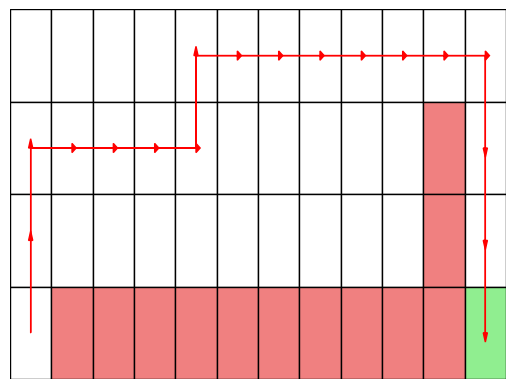

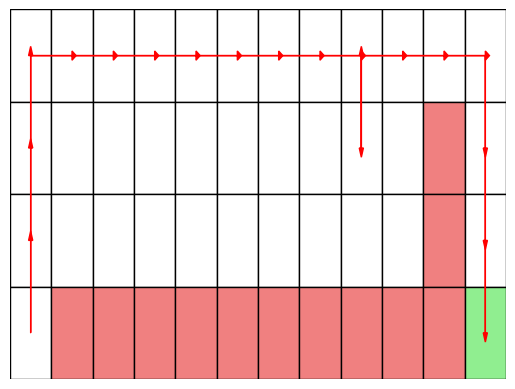

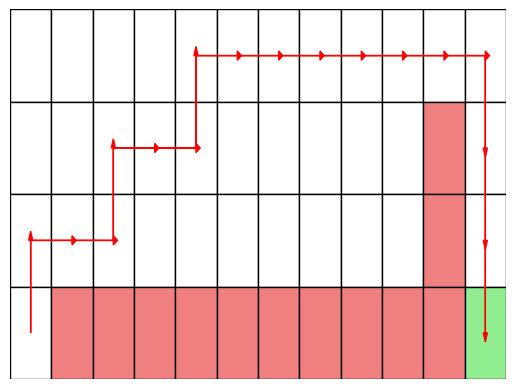

In [94]:
"""
Visualisation 
Q LEARNING AGENT
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# Snakepit grid
grid = np.full((4, 12), -1)
grid[3, 1:-1] = -100
grid[3, -1] = 20
grid[1, 10] = -100
grid[2, 10] = -100

epsilon_list = [0.01, 0.05, 0.1]
learning_rate = 0.1  # randomly chosen by me :)
rounds_till_win = 100
folder_path = ' Q_LEARNING'

for epsilon in epsilon_list:
    # f'q_table_a={learning_rate}_e={epsilon}_{100000}.npy'

    # Later on, load the JSON file
    with open(f'{folder_path}/Q_SP_path_a={learning_rate}_e={epsilon}_{rounds_till_win}.json', 'r') as f:
        path_dict = json.load(f)

    fig, ax = plt.subplots()
    # Set the grid limits
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw the grid cells with color
    for (i, j), val in np.ndenumerate(grid):
        if val == -100:
            facecolor = 'lightcoral'  # Light red color for -100 value
        elif val == 20:
            facecolor = 'lightgreen'  # Green color for the goal state
        else:
            facecolor = 'white'  # Default color for any other value

        ax.add_patch(plt.Rectangle((j - 0.5, 3 - i - 0.5), 1, 1, facecolor=facecolor, edgecolor='black', lw=1))
        # Annotate each cell with the corresponding value
        # ax.text(j, 3 - i, str(val), va='center', ha='center')

    # Draw the paths with arrows, each path in different color
    colors = ['red', 'blue', 'purple', 'orange', 'pink']
    color_index = 0

    for path_key, path in path_dict.items():
        # Ensure we cycle back to the first color if we run out of unique colors
        color = colors[color_index % len(colors)]
        for i in range(len(path) - 1):
            start_point = path[i]
            end_point = path[i + 1]
            # Calculate the change in x and y direction
            dx = end_point[1] - start_point[1]
            dy = (end_point[0] - start_point[0]) * -1  # Negative because of the y-axis inversion
            ax.arrow(start_point[1], 3 - start_point[0], dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
        # Increment the color index for the next path
        color_index += 1
    plt.axis('off')

    # plt.show()
    plt.savefig(f'{folder_path}/Q_SP_graph_e={epsilon}_a={learning_rate}_{rounds_till_win}.png')
    plt.show()


In [85]:
"""
3. Reinforcement Learning
Q LEARNING 
REPLAY BUFFER
"""
import numpy as np
import csv
import json
import random
import os

class Q_agent:
    def __init__(self, q_table, learning_rate, grid, epsilon):
        self.q_table = q_table
        self.epsilon = epsilon
        self.Q = None
        self.grid = grid
        self.move_counter = 0
        self.max_goal_reach = 100
        self.alpha = learning_rate
        self.terminal_goal_counter = 0
        self.track_states = {}
        self.test = False
        self.round = 1

        self.starting_row = 3
        self.starting_column = 0

        self.current_row = self.starting_row
        self.current_column = self.starting_column
        self.current_action_index = None
        self.current_sav = None
        self.current_reward = self.grid[self.starting_row, self.starting_column] # Starting state
        self.current_state = self.q_table[self.current_row, self.current_column]

        self.next_row = 3
        self.next_column = 0
        self.next_state = None
        self.next_state_action_index = None
        self.next_sav = None
        self.next_reward = None
        
        self.replay_buffer = []
        self.maxsize_replay_buffer = 1000
        # self.currentsize_replay_buffer = 0
        self.update_counter = 0
        self.replay_size = 25
    
    def add_experience_rp_buffer(self):
        experience = [self.current_row, self.current_column, self.current_action_index, self.next_row, self.next_column, self.next_state_action_index]
        
        if len(self.replay_buffer) == self.maxsize_replay_buffer:
            self.replay_buffer.pop(0)
        self.replay_buffer.append(experience)
    # 
    # def sample_batch_rp_buffer(self):
    #     pass

    # Moves, left right up or down
    def determine_next_move(self, action):

        self.next_row = self.current_row
        self.next_column = self.current_column
        # self.current_action_index = action

        if action == 0: # UP
            self.next_row -= 1
        elif action == 1: # DOWN
            self.next_row += 1
        elif action == 2: # LEFT
            self.next_column -= 1
        else: # RIGHT
            self.next_column += 1
        
        self.next_state = self.q_table[self.next_row, self.next_column]

        # Choose next action
        # Index and action are equal
        self.next_state_action_index = self.choose_action(self.next_state, self.next_row, self.next_column)
        
        # Index and action are equal
        self.next_sav = self.q_table[self.next_row, self.next_column, self.next_state_action_index]

    def move(self):
        self.move_counter += 1
        self.current_row = self.next_row
        self.current_column = self.next_column
        self.current_reward = self.grid[self.current_row, self.current_column]
        self.current_state = self.q_table[self.current_row, self.current_column]


    def get_possible_moves(self, row, column):
        possible_moves = [0,1,2,3]
        if row == 0:
            possible_moves.remove(0)
        if row == 3:
            possible_moves.remove(1)
        if column == 11:
            possible_moves.remove(3)
        if column == 0:
            possible_moves.remove(2)

        return possible_moves

    def Q_update_sav(self):
        next_possible_moves = self.get_possible_moves(self.next_row, self.next_column)
        possible_savs = {}
        for move in next_possible_moves:
            possible_savs[move] = self.q_table[self.next_row, self.next_column, move]
        next_max_action = max(possible_savs, key=lambda k:possible_savs[k])

        next_max_sav = self.q_table[self.next_row, self.next_column, next_max_action]
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + next_max_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav

    # Update state action values
    def update_sav(self):
        self.current_sav = self.q_table[self.current_row, self.current_column, self.current_action_index]
        self.next_reward = self.grid[self.next_row, self.next_column]
        self.current_sav = self.current_sav + self.alpha*(self.next_reward + self.next_sav) - self.current_sav
        self.q_table[self.current_row, self.current_column, self.current_action_index] = self.current_sav
    
    def update_sav_RPB(self, info):
        # return [self.current_row, self.current_column, self.current_action_index, self.next_row, self.next_column, self.next_state_action_index]
        self.update_counter += 1
        current_row = info[0]
        current_column = info[1]
        current_action = info[2]
        next_row = info[3]
        next_column = info[4]
        next_action = info[5]
    
        next_possible_moves = self.get_possible_moves(next_row, next_column)
        possible_savs = {}
        for move in next_possible_moves:
            possible_savs[move] = self.q_table[next_row, next_column, move]
        next_max_action = max(possible_savs, key=lambda k:possible_savs[k])

        next_max_sav = self.q_table[next_row, next_column, next_max_action]
        current_sav = self.q_table[current_row, current_column, current_action]
        next_reward = self.grid[next_row, next_column]
        current_sav = current_sav + self.alpha*(next_reward + next_max_sav) - current_sav
        self.q_table[current_row, current_column, current_action] = current_sav
        
    # Checks whether you are in a terminal state
    def check_terminal_state(self):
        if self.current_reward == -100 or self.current_reward == 20:
            self.round += 1
            self.current_column = self.starting_column
            self.current_row = self.starting_row

            # REMOVE LATER
            if self.current_reward == -100 and self.test is True:
                if self.round in self.track_states:
                    self.track_states[self.round].append((self.current_row, self.current_column))
                else:
                    self.track_states[self.round] = []
                    self.track_states[self.round].append((self.current_row, self.current_column))

            if self.current_reward == 20:
                self.terminal_goal_counter += 1
                # print('GOAL STATE WAS REACHED!')

    def choose_action(self, state, row, column):
        possible_actions = self.get_possible_moves(row,column)

        # while True:
        if np.random.rand() < self.epsilon:
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            action = random.choice(possible_actions)
        else:
            # Exploitation: choose the best action based on current Q-values
            actions_q_values = {}
            for action in possible_actions:
                actions_q_values[action] = state[action]
            action = max(actions_q_values, key=lambda k:actions_q_values[k])
        return action
    
    def get_action_info(self):
        
        return [self.current_row, self.current_column, self.current_action_index, self.next_row, self.next_column, self.next_state_action_index]
    
    def Q_main_loop(self):
        iteration_counter = 0
        while True:
            iteration_counter += 1
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.Q_update_sav()
            # self.move() # Move
                        # Every 10 steps, moves are replayed
            self.add_experience_rp_buffer()
            if iteration_counter % 50 == 0:
                # info = self.get_action_info()
                for i in range(self.replay_size):
                    info = random.choice(self.replay_buffer)
                    self.update_sav_RPB(info)  # Update sav
                    # iteration_counter += 1
            self.move() # Move
            self.check_terminal_state()  # Check terminal state
            if self.terminal_goal_counter == self.max_goal_reach:
                break

    def round_till_goal(self):
        iteration_counter = 0
        self.round = 0
        self.terminal_goal_counter = 0
        self.track_states[self.round] = []
        self.track_states[self.round].append((self.current_row, self.current_column))
        self.test = True

        while True:
            # Action index is the same as taken action
            # UP: 0, DOWN: 1, LEFT: 2, RIGHT: 3
            self.current_action_index = self.choose_action(self.current_state, self.current_row, self.current_column)
            self.determine_next_move(self.current_action_index)
            self.update_sav() # Update sav
            self.move() # Move

            if self.round in self.track_states:
                self.track_states[self.round].append((self.current_row, self.current_column))
            else:
                self.track_states[self.round] = []
                self.track_states[self.round].append((self.current_row, self.current_column))

            self.check_terminal_state() # Check terminal state
            iteration_counter += 1

            if self.terminal_goal_counter == 1:
                break
                
        with open(f'{folder_path}/Q_RPB_path_a={self.alpha}_e={self.epsilon}_{self.max_goal_reach}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.json', 'w') as json_file:
            json.dump(self.track_states, json_file)


if __name__ == '__main__':

    # CREATE GRID
    grid = np.full((4, 12), -1)
    grid[3, 1:-1] = -100
    grid[3, -1] = 20

    q_table = np.zeros((4, 12, 4))

    learning_rate = 0.1 # randomly chosen by me :)
    epsilon_list = [0.01, 0.05, 0.1]
    folder_path = ' Q_LEARNING'
    simulations = 10
    os.makedirs(folder_path, exist_ok=True)
    dict_train_info = {}
    
    for epsilon in epsilon_list:
        dict_train_info[epsilon] = [0,0,0,0,0]
    

    # Q learning
    for epsilon in epsilon_list:
        for _ in range(simulations):
            q_table = np.zeros((4, 12, 4))
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            game.Q_main_loop()
            print(f'epsilon {epsilon}')
            print(game.update_counter)
            # print(game.replay_buffer)
            
            # SAVE
            filename = f'Q_RPB_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.npy'
            full_path = os.path.join(folder_path, filename)
            
            dict_train_info[epsilon][0] += game.move_counter
            dict_train_info[epsilon][1] += game.round
            dict_train_info[epsilon][2] += game.round - game.max_goal_reach
            
            np.save(full_path, game.q_table)
            
            q_table = np.load(f'{folder_path}/Q_RPB_q_table_a={learning_rate}_e={epsilon}_maxgoal={game.max_goal_reach}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.npy')
            game = Q_agent(q_table, learning_rate, grid, epsilon)
            # game.Q = False
            game.round_till_goal()
            dict_train_info[epsilon][3] += game.move_counter
            dict_train_info[epsilon][4] += game.round
        

    for key, value in dict_train_info.items():
        mean_values = [x / simulations for x in value]
        dict_train_info[key] = mean_values
    
    # The filename where you want to store the data
    filename = f'{folder_path}/Q_RPB_AGENT_INFO_a={learning_rate}_sim={simulations}_maxgoal={game.max_goal_reach}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.csv'
    
    # Labels for the columns
    labels = ['Epsilon', 'Moves', 'Rounds', 'Fails', 'Moves_till_goal', 'Rounds_till_goal']
    
    # Write to the file
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(labels)
        
        # Write the dictionary data
        for key, value in dict_train_info.items():
            writer.writerow([key] + value)




epsilon 0.01
950
epsilon 0.01
950
epsilon 0.01
925
epsilon 0.01
950
epsilon 0.01
925
epsilon 0.01
950
epsilon 0.01
950
epsilon 0.01
950
epsilon 0.01
900
epsilon 0.01
950
epsilon 0.05
1025
epsilon 0.05
975
epsilon 0.05
1025
epsilon 0.05
1000
epsilon 0.05
975
epsilon 0.05
1075
epsilon 0.05
1025
epsilon 0.05
1050
epsilon 0.05
1025
epsilon 0.05
1025
epsilon 0.1
1125
epsilon 0.1
1125
epsilon 0.1
1200
epsilon 0.1
1150
epsilon 0.1
1125
epsilon 0.1
1175
epsilon 0.1
1175
epsilon 0.1
1125
epsilon 0.1
1100
epsilon 0.1
1100


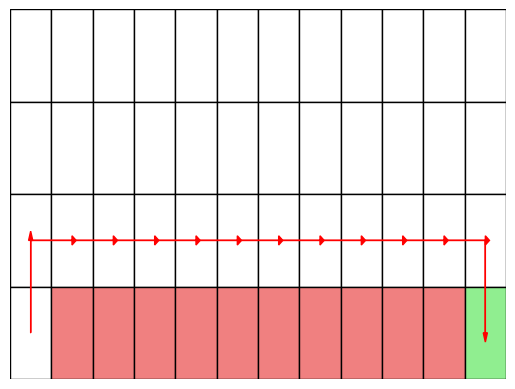

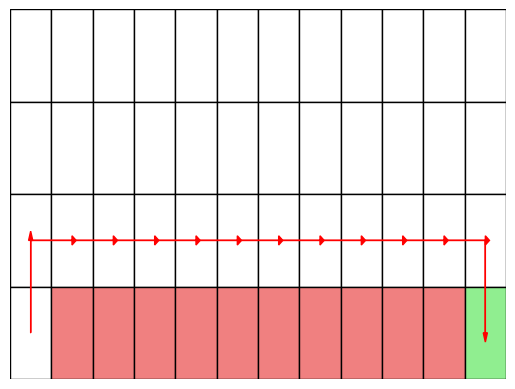

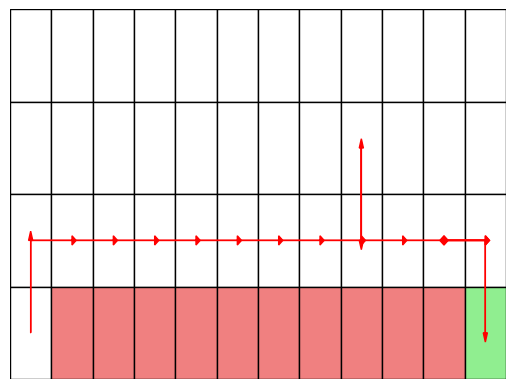

In [86]:
"""
Visualisation 
Q LEARNING AGENT
"""

import matplotlib.pyplot as plt
import numpy as np
import json

# Define the grid as per your values
grid = np.full((4, 12), -1)
grid[3, 1:-1] = -100
grid[3, -1] = 20

epsilon_list = [0.01, 0.05, 0.1]
learning_rate = 0.1  # randomly chosen by me :)
rounds_till_win = 100
folder_path = ' Q_LEARNING'
# size_replay_buffer =
# replay_size = 

for epsilon in epsilon_list:

    # Later on, load the JSON file
    with open(f'{folder_path}/Q_RPB_path_a={learning_rate}_e={epsilon}_{rounds_till_win}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.json', 'r') as f:
        path_dict = json.load(f)

    fig, ax = plt.subplots()
    # Set the grid limits
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 3.5)

    # Draw the grid cells with color
    for (i, j), val in np.ndenumerate(grid):
        if val == -100:
            facecolor = 'lightcoral'  # Light red color for -100 value
        elif val == 20:
            facecolor = 'lightgreen'  # Green color for the goal state
        else:
            facecolor = 'white'  # Default color for any other value

        ax.add_patch(plt.Rectangle((j - 0.5, 3 - i - 0.5), 1, 1, facecolor=facecolor, edgecolor='black', lw=1))
        # Annotate each cell with the corresponding value
        # ax.text(j, 3 - i, str(val), va='center', ha='center')

    # Draw the paths with arrows, each path in different color
    colors = ['red', 'blue', 'purple', 'orange', 'pink']
    color_index = 0

    for path_key, path in path_dict.items():
        # Ensure we cycle back to the first color if we run out of unique colors
        color = colors[color_index % len(colors)]
        for i in range(len(path) - 1):
            start_point = path[i]
            end_point = path[i + 1]
            # Calculate the change in x and y direction
            dx = end_point[1] - start_point[1]
            dy = (end_point[0] - start_point[0]) * -1  # Negative because of the y-axis inversion
            ax.arrow(start_point[1], 3 - start_point[0], dx, dy, head_width=0.1, head_length=0.1, fc=color, ec=color)
        # Increment the color index for the next path
        color_index += 1
    plt.axis('off')

    # plt.show()
    plt.savefig(f'{folder_path}/Q_RPB_graph_e={epsilon}_a={learning_rate}_{rounds_till_win}_RPB={game.maxsize_replay_buffer}_RPS={game.replay_size}.png')
    plt.show()
